In [1]:
import torch
import torch.nn as nn
from data import download
from model.base.geometry import Geometry

import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T
import torchvision.transforms.functional as F
from model.base.geometry import Geometry
import random
from model import scot_CAM, util, geometry
from PIL import Image, ImageDraw
from torch.utils.data import DataLoader
import os
from torchvision import transforms
import matplotlib.patches as patches
# from torchsummary import summary
import torch.nn.functional as F
# import gluoncv.model_zoo.fcn as fcv
from data import download
import math
import re

In [5]:
weak_lambda = '[1.0,1.0,1.0]'
weak_lambda = torch.FloatTensor(list(map(float, re.findall(r"[-+]?(?:\d*\.*\d+)", weak_lambda)))).cuda()
weak_lambda, (weak_lambda>0.0).tolist()

(tensor([1., 1., 1.], device='cuda:0'), [True, True, True])

In [2]:
torch.tensor([1,1,1])

tensor([1, 1, 1])

In [7]:
a = torch.rand((1, 4, 3, 2))
a, a.view((1,2,6,2))

(tensor([[[[0.9477, 0.4218],
           [0.4534, 0.1313],
           [0.6578, 0.9932]],
 
          [[0.8667, 0.6526],
           [0.0234, 0.4425],
           [0.8972, 0.4202]],
 
          [[0.9926, 0.3751],
           [0.3236, 0.7190],
           [0.3109, 0.0781]],
 
          [[0.6176, 0.2554],
           [0.3518, 0.5013],
           [0.8065, 0.3283]]]]),
 tensor([[[[0.9477, 0.4218],
           [0.4534, 0.1313],
           [0.6578, 0.9932],
           [0.8667, 0.6526],
           [0.0234, 0.4425],
           [0.8972, 0.4202]],
 
          [[0.9926, 0.3751],
           [0.3236, 0.7190],
           [0.3109, 0.0781],
           [0.6176, 0.2554],
           [0.3518, 0.5013],
           [0.8065, 0.3283]]]]))

In [4]:
w = nn.Parameter(torch.ones(3, dtype=torch.float))
w.detach().cpu().numpy()

array([1., 1., 1.], dtype=float32)

In [18]:
correlation_matrix = torch.rand((2,2,2))

correlation_matrix, correlation_matrix.norm(dim=1), correlation_matrix.norm(dim=1).mean(dim=1), correlation_matrix.norm(dim=1).mean()

(tensor([[[0.0076, 0.8593],
          [0.4502, 0.5983]],
 
         [[0.8513, 0.4438],
          [0.1998, 0.0199]]]),
 tensor([[0.4503, 1.0471],
         [0.8744, 0.4443]]),
 tensor([0.7487, 0.6594]),
 tensor(0.7040))

In [27]:
sum = torch.sum(correlation_matrix, dim=2, keepdim=True)
sum, correlation_matrix/sum

(tensor([[[1.5939],
          [0.7141]]]),
 tensor([[[0.4615, 0.5385],
          [0.1219, 0.8781]]]))

In [20]:
correlation_matrix = torch.rand((1,6,6))
side = int(math.sqrt(correlation_matrix.size(1)))
trg2src_dist = correlation_matrix.view(1, -1, side, side)
src2trg_dist = correlation_matrix.view(1, side, side, -1).permute(0, 3, 1, 2)

correlation_matrix, trg2src_dist, src2trg_dist

(tensor([[[0.9429, 0.9394, 0.2070, 0.1096, 0.7634, 0.9182],
          [0.0251, 0.6994, 0.8350, 0.6213, 0.1823, 0.1834],
          [0.8981, 0.5750, 0.7389, 0.8305, 0.4662, 0.1385],
          [0.7647, 0.3556, 0.9388, 0.6758, 0.9852, 0.2057],
          [0.6267, 0.7599, 0.1067, 0.2123, 0.6653, 0.6808],
          [0.8105, 0.8798, 0.1600, 0.3752, 0.1365, 0.8265]]]),
 tensor([[[[0.9429, 0.9394],
           [0.2070, 0.1096]],
 
          [[0.7634, 0.9182],
           [0.0251, 0.6994]],
 
          [[0.8350, 0.6213],
           [0.1823, 0.1834]],
 
          [[0.8981, 0.5750],
           [0.7389, 0.8305]],
 
          [[0.4662, 0.1385],
           [0.7647, 0.3556]],
 
          [[0.9388, 0.6758],
           [0.9852, 0.2057]],
 
          [[0.6267, 0.7599],
           [0.1067, 0.2123]],
 
          [[0.6653, 0.6808],
           [0.8105, 0.8798]],
 
          [[0.1600, 0.3752],
           [0.1365, 0.8265]]]]),
 tensor([[[[0.9429, 0.6213],
           [0.7647, 0.2123]],
 
          [[0.9394, 0.1823

In [21]:
torch.FloatTensor(list(map(float, re.findall(r"[-+]?(?:\d*\.*\d+)", '[1.0, 1.0, 1.0]'))))

tensor([1., 1., 1.])

In [11]:
a = torch.rand((1,17)).view(-1).tolist()
weight_dict = dict()
for i, weight in enumerate(a):
    weight_dict['weight%d'%(i)] = weight
print(weight_dict)

{'weight0': 0.623123824596405, 'weight1': 0.3813868761062622, 'weight2': 0.05281180143356323, 'weight3': 0.3220527768135071, 'weight4': 0.18277543783187866, 'weight5': 0.2068852186203003, 'weight6': 0.42448341846466064, 'weight7': 0.653380274772644, 'weight8': 0.4360243082046509, 'weight9': 0.23244887590408325, 'weight10': 0.9975162744522095, 'weight11': 0.08176273107528687, 'weight12': 0.2496148943901062, 'weight13': 0.18608415126800537, 'weight14': 0.3838173747062683, 'weight15': 0.38667434453964233, 'weight16': 0.512338399887085}


In [292]:
a = torch.rand((2, 2, 2))
a

tensor([[[0.6010, 0.3054],
         [0.6857, 0.2773]],

        [[0.1189, 0.9696],
         [0.8853, 0.1191]]])

In [298]:
b = nn.Identity()
b(a)

tensor([[[0.6010, 0.3054],
         [0.6857, 0.2773]],

        [[0.1189, 0.9696],
         [0.8853, 0.1191]]])

In [293]:
row_softmax = nn.Softmax(dim=2)
col_softmax = nn.Softmax(dim=1)

In [295]:
row_softmax(a), col_softmax(a)

(tensor([[[0.5734, 0.4266],
          [0.6007, 0.3993]],
 
         [[0.2993, 0.7007],
          [0.6827, 0.3173]]]),
 tensor([[[0.4788, 0.5070],
          [0.5212, 0.4930]],
 
         [[0.3173, 0.7007],
          [0.6827, 0.2993]]]))

In [291]:
b

[tensor([[[0.6988, 0.7376]],
 
         [[0.8457, 0.5539]]])]

In [260]:
a = torch.rand((2, 3, 1))
a, torch.sum(a, dim=1), (a.squeeze(-1)/torch.sum(a, dim=1)).size()

(tensor([[[0.2438],
          [0.6877],
          [0.6310]],
 
         [[0.5056],
          [0.9516],
          [0.3757]]]),
 tensor([[1.5624],
         [1.8329]]),
 torch.Size([2, 3]))

In [166]:
a = (2,3)
a[0]

2

In [148]:
n1 = 2
b = torch.ones((n1,))/n1
b.size()

torch.Size([2])

In [139]:
_, labels = torch.topk(logits, k=2, dim=1)
labels.size()

torch.Size([2, 2])

In [113]:
seed=0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [114]:
a = torch.rand((2,3,4))
b = 300/torch.max(torch.tensor(a.size()).float())
torch.stack((b,b)), torch.tensor((75,75)).float()

(tensor([75., 75.]), tensor([75., 75.]))

In [74]:
benchmark = "pfpascal"
backbone = "resnet101"
datapath="./Datasets_SCOT/"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cam=""
thres="auto"
split="trn"

n_layers = {"resnet50": 17, "resnet101": 34, "fcn101": 34}
hyperpixels = list(range(n_layers[backbone]))
model = scot_CAM.SCOT_CAM(
        backbone,
        hyperpixels,
        benchmark,
        device,
        cam,
    )
# summary(model.backbone, (3,256,256))
# checkpoint = torch.load("./backbone/dino_r50.pth", map_location=torch.device("cpu"))
# for key, value in checkpoint.items():
#     # if key == "state_dict":
#     #     for subkey, subvalue in value.items():
#     #         print(subkey, subvalue.size())
#     # else:
#     #     print(value)
#     # if key == "state_dict":
#     #     for subkey, subvalue in value.items():
#     #         print(subkey, subvalue.size())
#     # print(key)
#     pass

# print(model.backbone.conv1.weight[1,:,:3,:3])
# print(model.backbone.fc.weight[:2,:5])
# model.backbone.load_state_dict(checkpoint, strict=False)
# print(model.backbone.conv1.weight[1,:,:3,:3])
# print(model.backbone.fc.weight[:2,:5])
# if 'state_dict' in checkpoint:
#     print("True")

# model.train()

In [151]:
ckp = torch.zeros((1,17))-1000
for i in [3,10,11,12,13]:
    ckp[0,i] = 1000
ckp = nn.Parameter(ckp)
# ckp, ckp.sigmoid()

In [152]:
model.learner.layerweight = ckp

In [153]:
model.learner.layerweight.sigmoid()

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.]],
       grad_fn=<SigmoidBackward0>)

In [154]:
torch.save(model.state_dict(), "./backbone/ckp_r50.pt")

In [81]:
model.load_state_dict(torch.load("./backbone/ckp.pt", map_location=device))
model.learner.layerweight.sigmoid()

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.]],
       grad_fn=<SigmoidBackward0>)

In [87]:
benchmark = "pfpascal"
backbone = "resnet50"
datapath="./Datasets_SCOT/"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cam=""
thres="auto"
split="trn"

n_layers = {"resnet50": 17, "resnet101": 34, "fcn101": 34}
hyperpixels = list(range(n_layers[backbone]))
model = scot_CAM.SCOT_CAM(
        backbone,
        hyperpixels,
        benchmark,
        device,
        cam,
    )

checkpoint = torch.load("./backbone/densecl_r50_imagenet_200ep.pth", map_location=device)
for key, value in checkpoint.items():
    # if key == "state_dict":
    #     for subkey, subvalue in value.items():
    #         print(subkey, subvalue.size())
    # else:
    #     print(value)
    if key == "state_dict":
        for subkey, subvalue in value.items():
            #print(subkey, subvalue.size())
            pass
    # print(key, type(value))
    # print(key)

print(model.backbone.conv1.weight[1,:,:2,:2])
print(model.backbone.fc.weight[:2,:5])
model.backbone.load_state_dict(checkpoint['state_dict'], strict=False)
print(model.backbone.conv1.weight[1,:,:2,:2])
print(model.backbone.fc.weight[:2,:5])

if 'state_dict' in checkpoint:
    print("True")

tensor([[[ 0.0686,  0.0380],
         [ 0.0618,  0.0184]],

        [[-0.0990, -0.0721],
         [-0.0706, -0.0392]],

        [[ 0.0427,  0.0473],
         [ 0.0363,  0.0335]]], grad_fn=<SliceBackward0>)
tensor([[-0.0092,  0.0153, -0.0375,  0.0017, -0.0436],
        [ 0.0104, -0.0266,  0.0005, -0.0160, -0.0200]],
       grad_fn=<SliceBackward0>)
tensor([[[-0.0096, -0.0166],
         [-0.0074, -0.0103]],

        [[ 0.0275,  0.0311],
         [ 0.0256,  0.0267]],

        [[-0.0092, -0.0144],
         [-0.0048, -0.0020]]], grad_fn=<SliceBackward0>)
tensor([[-0.0092,  0.0153, -0.0375,  0.0017, -0.0436],
        [ 0.0104, -0.0266,  0.0005, -0.0160, -0.0200]],
       grad_fn=<SliceBackward0>)
True


In [25]:
for param_tensor in model.backbone.state_dict():
    print(param_tensor, "\t", model.backbone.state_dict()[param_tensor].size())

conv1.weight 	 torch.Size([64, 3, 7, 7])
bn1.weight 	 torch.Size([64])
bn1.bias 	 torch.Size([64])
bn1.running_mean 	 torch.Size([64])
bn1.running_var 	 torch.Size([64])
bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv1.weight 	 torch.Size([64, 64, 1, 1])
layer1.0.bn1.weight 	 torch.Size([64])
layer1.0.bn1.bias 	 torch.Size([64])
layer1.0.bn1.running_mean 	 torch.Size([64])
layer1.0.bn1.running_var 	 torch.Size([64])
layer1.0.bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight 	 torch.Size([64])
layer1.0.bn2.bias 	 torch.Size([64])
layer1.0.bn2.running_mean 	 torch.Size([64])
layer1.0.bn2.running_var 	 torch.Size([64])
layer1.0.bn2.num_batches_tracked 	 torch.Size([])
layer1.0.conv3.weight 	 torch.Size([256, 64, 1, 1])
layer1.0.bn3.weight 	 torch.Size([256])
layer1.0.bn3.bias 	 torch.Size([256])
layer1.0.bn3.running_mean 	 torch.Size([256])
layer1.0.bn3.running_var 	 torch.Size([256])
layer1.0.bn3.num_batches_tracked 	 t

In [99]:
idx = 0
j_in = 1
r_in = 1

jsr = {}
jsz = []
rfsz = []

for name, layer in model.backbone.named_children():
    
    if isinstance(layer, nn.ReLU) or isinstance(layer, nn.BatchNorm2d):
        continue
    
    if name in ["layer1", "layer2", "layer3", "layer4"]:
        print(name)
        for mod_name, mod in layer.named_children():
            # print(mod_name)
            for sub_mod_name, sub_mod in mod.named_children():
                # print(sub_mod_name)
                if isinstance(sub_mod, nn.ReLU) or isinstance(sub_mod, nn.BatchNorm2d):
                    continue
                # print(sub_mod_name, sub_mod)
                if isinstance(sub_mod, nn.Conv2d):
                    current_name = sub_mod_name+"-"+mod_name
                    stride = sub_mod.stride[0]
                    kernel = sub_mod.kernel_size[0]
                    # print(current_module, stride, kernel)

                    j_out = j_in * stride
                    r_out = r_in + (kernel - 1) * j_in
                    jsr[current_name] = (j_out, r_out)
                    j_in = j_out
                    r_in = r_out
                    if sub_mod_name == "conv3":
                        print(current_name, jsr[current_name])
                        jsz.append(j_out)
                        rfsz.append(r_out)
    else:
        # print(name, layer)
        
        if isinstance(layer, nn.Conv2d):
            stride = layer.stride[0]
            kernel = layer.kernel_size[0]

        if isinstance(layer, nn.MaxPool2d):
            stride = layer.stride
            kernel = layer.kernel_size

        j_out = j_in * stride
        r_out = r_in + (kernel - 1) * j_in
        jsr[name] = (j_out, r_out)
        j_in = j_out
        r_in = r_out
        if isinstance(layer, nn.MaxPool2d):
            print(name, jsr[name])
            jsz.append(j_out)
            rfsz.append(r_out)


        
    # break

# for key, value in jsr.items():
#     print(key, value)
    
print(jsz)
print(rfsz)
len(jsz), len(rfsz)

maxpool (4, 11)
layer1
conv3-0 (4, 19)
conv3-1 (4, 27)
conv3-2 (4, 35)
layer2
conv3-0 (8, 43)
conv3-1 (8, 59)
conv3-2 (8, 75)
conv3-3 (8, 91)
layer3
conv3-0 (16, 107)
conv3-1 (16, 139)
conv3-2 (16, 171)
conv3-3 (16, 203)
conv3-4 (16, 235)
conv3-5 (16, 267)
layer4
conv3-0 (32, 299)
conv3-1 (32, 363)
conv3-2 (32, 427)
[4, 4, 4, 4, 8, 8, 8, 8, 16, 16, 16, 16, 16, 16, 32, 32, 32]
[11, 19, 27, 35, 43, 59, 75, 91, 107, 139, 171, 203, 235, 267, 299, 363, 427]


(17, 17)

In [6]:
for name, param in model.backbone.named_parameters():
    print(name, param.size())

conv1.weight torch.Size([64, 3, 7, 7])
bn1.weight torch.Size([64])
bn1.bias torch.Size([64])
layer1.0.conv1.weight torch.Size([64, 64, 1, 1])
layer1.0.bn1.weight torch.Size([64])
layer1.0.bn1.bias torch.Size([64])
layer1.0.conv2.weight torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight torch.Size([64])
layer1.0.bn2.bias torch.Size([64])
layer1.0.conv3.weight torch.Size([256, 64, 1, 1])
layer1.0.bn3.weight torch.Size([256])
layer1.0.bn3.bias torch.Size([256])
layer1.0.downsample.0.weight torch.Size([256, 64, 1, 1])
layer1.0.downsample.1.weight torch.Size([256])
layer1.0.downsample.1.bias torch.Size([256])
layer1.1.conv1.weight torch.Size([64, 256, 1, 1])
layer1.1.bn1.weight torch.Size([64])
layer1.1.bn1.bias torch.Size([64])
layer1.1.conv2.weight torch.Size([64, 64, 3, 3])
layer1.1.bn2.weight torch.Size([64])
layer1.1.bn2.bias torch.Size([64])
layer1.1.conv3.weight torch.Size([256, 64, 1, 1])
layer1.1.bn3.weight torch.Size([256])
layer1.1.bn3.bias torch.Size([256])
layer1.2.conv1.weight tor

In [224]:
def list_mean(x):
    r"""Computes average of a list"""
    return sum(x) / len(x) if len(x) > 0 else 0.0

In [250]:
sel_buffer = {'aeroplane': [], 'bicycle': [63.63636363636363, 90.9090909090909, 100.0], 'bird': [], 'boat': [], 'bottle': [], 
              'bus': [83.33333333333334, 100.0], 'car': [100.0], 'cat': [80.0, 80.0, 87.5, 100.0, 62.5], 'chair': [], 'cow': [], 
              'diningtable': [], 'dog': [60.0, 100.0], 'horse': [], 'motorbike': [], 'person': [], 'pottedplant': [], 'sheep': [], 
              'sofa': [100.0], 'train': [40.0], 'tvmonitor': [100.0]}

mean_sel_buffer = {}
mean_values = []
for (key, value) in sel_buffer.items():
    # print(key, "%.3f" % list_mean(value))
    mean_sel_buffer[key] = list_mean(value)
    mean_values.append(value)
mean_sel_buffer

{'aeroplane': 0.0,
 'bicycle': 84.84848484848484,
 'bird': 0.0,
 'boat': 0.0,
 'bottle': 0.0,
 'bus': 91.66666666666667,
 'car': 100.0,
 'cat': 82.0,
 'chair': 0.0,
 'cow': 0.0,
 'diningtable': 0.0,
 'dog': 80.0,
 'horse': 0.0,
 'motorbike': 0.0,
 'person': 0.0,
 'pottedplant': 0.0,
 'sheep': 0.0,
 'sofa': 100.0,
 'train': 40.0,
 'tvmonitor': 100.0}

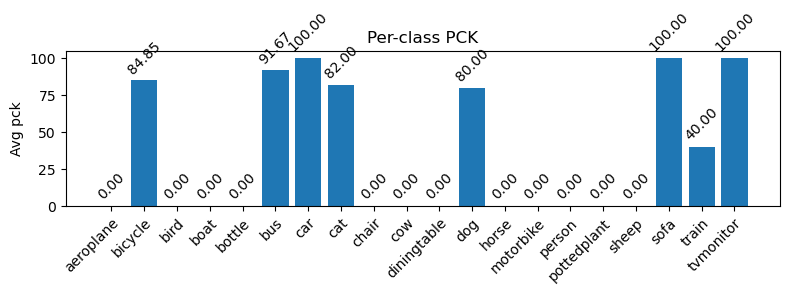

In [284]:
names = list(mean_sel_buffer.keys())
values = list(mean_sel_buffer.values())

fig, axs = plt.subplots(1, 1, figsize=(8, 3), sharey=True)
pps = axs.bar(names[:20], values[:20])

plt.setp(axs.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
axs.set_ylabel('Avg pck')

for p in pps:
    height = p.get_height()
    axs.annotate('%.2f'%(height),
                    xy=(p.get_x()+p.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=45)
axs.set_title('Per-class PCK')
fig.tight_layout()
# axs[0,1].bar(names[5:10], values[5:10])

# axs[1,1].bar(names[15:20], values[15:20])

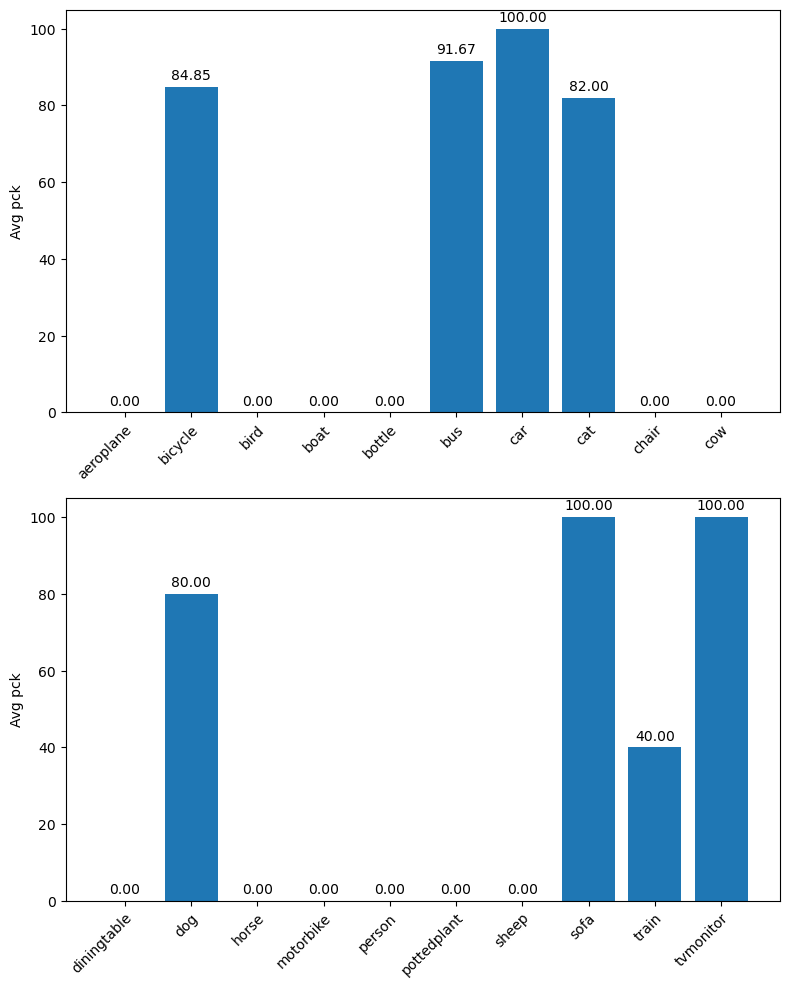

In [267]:
names = list(mean_sel_buffer.keys())
values = list(mean_sel_buffer.values())

fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharey=True)
pps0 = axs[0].bar(names[:10], values[:10])
pps1 = axs[1].bar(names[10:20], values[10:20])

pps = [pps0, pps1]
for id in range(2):
    plt.setp(axs[id].get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    axs[id].set_ylabel('Avg pck')

    for p in pps[id]:
        height = p.get_height()
        axs[id].annotate('%.2f'%(height),
                        xy=(p.get_x()+p.get_width()/2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom')
fig.tight_layout()
# axs[0,1].bar(names[5:10], values[5:10])

# axs[1,1].bar(names[15:20], values[15:20])




In [203]:
a = torch.tensor([70.0000, 25.0000, 75.0000, 28.5714])
val, idx = torch.min(a, dim=0)
val, idx.item()

(tensor(25.), 1)

In [209]:
name = "2008_00.jpg"
name[:-4]

'2008_00'

In [214]:
"Pair=%s, epoch=%d, step=%d, pck=%.2f" % ("tree", 2, 3, 2.4325)

'Pair=tree, epoch=2, step=3, pck=2.43'

In [208]:
pck_ids = torch.zeros((2,2), dtype=torch.uint8)
pck_ids[0,0]= 1
pck_ids

tensor([[1, 0],
        [0, 0]], dtype=torch.uint8)

In [196]:
hyperpixel = list(range(34))
model = scot_CAM.SCOT_CAM(backbone, hyperpixel, benchmark, device, cam, use_xavier=True)
dset = download.load_dataset(benchmark, datapath, thres, device, split, cam, img_side=(256,256))
dataloader = DataLoader(dset, batch_size=1, num_workers=0)
print('loader_size', len(dataloader))

def get_concat_h(im1, im2):
    max_height = max(im1.height, im2.height)
    dst = Image.new('RGB', (im1.width + im2.width, max_height), color="white")
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def draw_keypoints_on_image(src_img, trg_img, src_kps, trg_kps, n_pts, color='red',
                            radius=2):
    
    r"""Draw keypoints on image
    
    Args:
        src_img, trg_img: The original PIL.Image object
        src_kps, trg_kps: a tensor with shape [2, n_pts]

    """

    # 1. concatenate images horizontally
    con_img = get_concat_h(src_img, trg_img)

    # 2. draw keypoints and connected lines
    draw = ImageDraw.Draw(con_img)
    for idx in range(n_pts):
        draw.ellipse([(src_kps[0,idx] - radius, src_kps[1,idx] - radius),
                    (src_kps[0,idx] + radius, src_kps[1,idx] + radius)],
                    outline=color, fill=color)
        draw.ellipse([(trg_kps[0,idx] - radius + con_img.width//2, trg_kps[1,idx] - radius),
            (trg_kps[0,idx] + radius + con_img.width//2, trg_kps[1,idx] + radius)],
            outline=color, fill=color)
        draw.line((src_kps[0,idx], src_kps[1,idx], 
                   trg_kps[0,idx]+ con_img.width//2, trg_kps[1,idx]), joint="curve", fill=color, width=5)
        
        
    return con_img


loader_size 2940


['2007_007109.jpg'] ['2010_001503.jpg']
tensor([1])
[ 15.70132751  58.88000143 165.88799782 218.62400529]
271.7013275146485 tensor([[1.],
        [1.]])
(256, 512, 3)


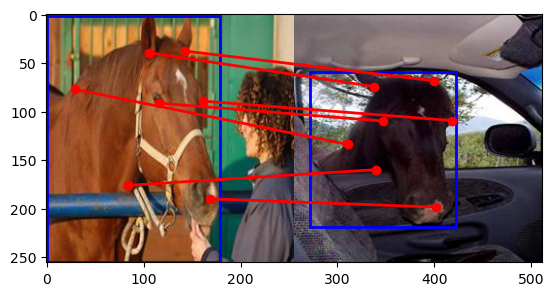

In [197]:
imside = (256,256) # HxW

trns = T.ToPILImage()

origin = False

for idx, sample in enumerate(dataloader):

    if sample['src_imname'][0] != "2007_007109.jpg":
        continue

    print(sample['src_imname'], sample['trg_imname'])
    print(sample['flip'])
    
    # 1. original PIL image
    src_img = dataloader.dataset.get_image(sample['src_imname'][0])
    trg_img = dataloader.dataset.get_image(sample['trg_imname'][0])

    if not origin:
        src_img = src_img.resize((imside[1], imside[0])) # (width, height). 
        trg_img =  trg_img.resize((imside[1], imside[0]))

    if sample['flip'][0].item() == 1:
        src_img = src_img.transpose(Image.FLIP_LEFT_RIGHT)
        trg_img = trg_img.transpose(Image.FLIP_LEFT_RIGHT)

    n_pts = sample['n_pts'][0]

    if origin:
        src_ratio = sample['src_ratio'][0].flip(dims=(0,)).view(2,-1) # wxh
        trg_ratio = sample['trg_ratio'][0].flip(dims=(0,)).view(2,-1)
    else:
        src_ratio = torch.ones((2,1)) 
        trg_ratio = torch.ones((2,1))

    # rescale to original points
    src_kps = (sample['src_kps'][0][:,:n_pts.item()] / src_ratio).numpy()
    trg_kps = (sample['trg_kps'][0][:,:n_pts.item()] / trg_ratio).numpy()
    # print(src_kps)

    src_bbox = sample['src_bbox'][0].numpy()
    trg_bbox = sample['trg_bbox'][0].numpy()
    src_bbox_start = (src_bbox[0]/src_ratio.numpy()[0], src_bbox[1]/src_ratio.numpy()[1])
    src_bbox_w, src_bbox_h = (src_bbox[2] - src_bbox[0])/src_ratio.numpy()[0], (src_bbox[3] - src_bbox[1])/src_ratio.numpy()[1]

    trg_bbox_start = ((trg_bbox[0]/trg_ratio.numpy()[0] + src_img.width), trg_bbox[1]/trg_ratio.numpy()[1])
    trg_bbox_w, trg_bbox_h = (trg_bbox[2] - trg_bbox[0])/trg_ratio.numpy()[0], (trg_bbox[3] - trg_bbox[1])/trg_ratio.numpy()[1]

    print(trg_bbox)
    print(trg_bbox[0] + src_img.width, trg_ratio)
    
    # con_img =  draw_keypoints_on_image(src_img, trg_img, src_kps, trg_kps, n_pts, color='red',radius=4)
    # con_img.show()
    # con_img.close()

    src_rect = patches.Rectangle(src_bbox_start, src_bbox_w, src_bbox_h, linewidth=2, edgecolor='b', facecolor='none')
    trg_rect = patches.Rectangle(trg_bbox_start, trg_bbox_w, trg_bbox_h, linewidth=2, edgecolor='b', facecolor='none')

    con_img = get_concat_h(src_img, trg_img)
    con_img = np.array(con_img)
    print(con_img.shape)

    fig, ax = plt.subplots()
    ax.imshow(con_img)

    for idx in range(n_pts):
        ax.plot(src_kps[0,idx], src_kps[1,idx], marker='o', color="red")
        ax.plot(trg_kps[0,idx] + src_img.width, trg_kps[1,idx], marker='o', color="red")
        ax.plot([src_kps[0,idx], trg_kps[0,idx] + + src_img.width], [src_kps[1,idx], trg_kps[1,idx]], color="red", linewidth=2)

    # Add the patch to the Axes
    ax.add_patch(src_rect)
    ax.add_patch(trg_rect)

    plt.show()
    plt.close(fig)

    break


In [ ]:
mask = torch.rand((2,3,3))
pos = torch.tensor([[1,2],[2,2]])
mask[:, pos[:,0], pos[:,1]], mask

(tensor([[0.2668, 0.2494],
         [0.9330, 0.0034]]),
 tensor([[[0.4453, 0.3475, 0.9295],
          [0.1945, 0.7514, 0.2668],
          [0.0780, 0.9415, 0.2494]],
 
         [[0.0414, 0.7291, 0.0306],
          [0.3613, 0.2177, 0.9330],
          [0.1660, 0.2307, 0.0034]]]))

In [ ]:
torch.ones(mask.size())

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [ ]:
feat = [25, 60]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Geometry.initialize(feat, device)
Geometry.rfs

tensor([[ -5.,  -5.,   5.,   5.],
        [ -1.,  -5.,   9.,   5.],
        [  3.,  -5.,  13.,   5.],
        ...,
        [223.,  91., 233., 101.],
        [227.,  91., 237., 101.],
        [231.,  91., 241., 101.]])

In [ ]:
datapath = "./Datasets_SCOT"
benchmark = "pfpascal"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trn_ds = download.load_dataset(
    benchmark, datapath, 'auto', device, "trn"
)
Geometry.initialize([int(240 / 4)] * 2, device)
sample = trn_ds[0]
sample['src_imname'], sample['trg_imname']

('2008_006579.jpg', '2008_004280.jpg')

In [ ]:
sample['src_img'].size()

torch.Size([3, 240, 240])

In [ ]:
transform = T.ToPILImage()
src_img = transform(sample['src_img'])
src_img.show()

In [ ]:
sample['src_kps'][:,:11].t(), sample['src_img'].size()

(tensor([[110.8043,  30.0343],
         [ 61.6475,  21.4629],
         [ 83.7810,  25.2343],
         [175.0170,  50.9486],
         [ 63.8609, 166.0800],
         [197.8967, 146.0572],
         [ 77.3468, 112.6629],
         [169.4836, 112.4914],
         [ 11.8044, 169.4629],
         [230.0502, 133.1200],
         [148.6885, 151.4057]]),
 torch.Size([3, 240, 240]))

In [ ]:
sample['src_kps'].size()

torch.Size([2, 40])

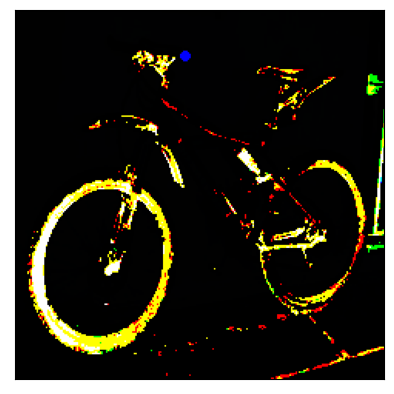

In [ ]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
res = draw_keypoints(sample['src_img'].to(torch.uint8), sample['src_kps'][:,:1].t().unsqueeze(0), colors="blue", radius=3)
show(res)

In [ ]:
layerweight = torch.rand(2)
layerweight, layerweight.size()

(tensor([0.9131, 0.1524]), torch.Size([2]))

In [ ]:
torch.stack((layerweight, layerweight*2))

tensor([[0.9131, 0.1524],
        [1.8262, 0.3049]])

In [ ]:
width = 5
height = 3
feat_ids = torch.tensor(list(range(width))).repeat(1, height).t().repeat(1, 2)
feat_ids

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4],
        [0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4],
        [0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4]])

In [ ]:
torch.div(4,2)

tensor(2.)

In [ ]:
a, _ = torch.min(layerweight.view(2,2, -1), dim=-1, keepdim=True)
b, _ = torch.max(layerweight.view(2,2, -1), dim=-1, keepdim=True)
a = a.unsqueeze(-1)
b = b.unsqueeze(-1)
output = [a, b]
torch.stack(output, dim=0).size()

RuntimeError: shape '[2, 2, -1]' is invalid for input of size 2

In [ ]:
for i in layerweight:
    print(i)

tensor([0.0622, 0.5995, 0.5574, 0.4260], grad_fn=<UnbindBackward0>)
tensor([0.4517, 0.3018, 0.2639, 0.3179], grad_fn=<UnbindBackward0>)
tensor([0.5644, 0.4438, 0.8929, 0.1434], grad_fn=<UnbindBackward0>)
tensor([0.4365, 0.0534, 0.3448, 0.4183], grad_fn=<UnbindBackward0>)
tensor([0.3725, 0.2385, 0.7257, 0.7884], grad_fn=<UnbindBackward0>)


In [ ]:
indx = torch.tensor([[1, 2],
        [2, 3],
        [4, 2]])
indx, layerweight[indx,:]

(tensor([[1, 2],
         [2, 3],
         [4, 2]]),
 tensor([[[0.4517, 0.3018, 0.2639, 0.3179],
          [0.5644, 0.4438, 0.8929, 0.1434]],
 
         [[0.5644, 0.4438, 0.8929, 0.1434],
          [0.4365, 0.0534, 0.3448, 0.4183]],
 
         [[0.3725, 0.2385, 0.7257, 0.7884],
          [0.5644, 0.4438, 0.8929, 0.1434]]], grad_fn=<IndexBackward0>))

In [ ]:
a, b = torch.topk(layerweight, k=2, dim=1)
a.size(), b.size()

(torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
for w in layerweight:
    print(w, w.size())

tensor([0.4348, 0.2469, 0.7737], grad_fn=<UnbindBackward0>) torch.Size([3])
tensor([0.5936, 0.8155, 0.5849], grad_fn=<UnbindBackward0>) torch.Size([3])
tensor([0.6835, 0.1935, 0.2812], grad_fn=<UnbindBackward0>) torch.Size([3])


In [ ]:
layerweight.view(-1)

torch.Size([12])

In [ ]:
nn.init.xavier_normal_(layerweight)
layerweight, layerweight[0,0]

(Parameter containing:
 tensor([[ 0.5203,  0.2057, -0.3992,  0.1920, -0.7269, -0.2973, -0.4138, -0.3002,
           0.1587,  0.1106, -0.2072,  0.2853]], requires_grad=True),
 tensor(0.5203, grad_fn=<SelectBackward0>))

In [ ]:
a = torch.rand(34)
a, "%.3f"%a[0], len(a)

(tensor([0.5265, 0.9707, 0.8418, 0.6118, 0.5200, 0.7239, 0.0053, 0.0175, 0.3823,
         0.8986, 0.0892, 0.1735, 0.2137, 0.9684, 0.1419, 0.5230, 0.5656, 0.4817,
         0.4057, 0.7731, 0.9104, 0.8744, 0.5702, 0.5723, 0.4346, 0.8264, 0.2971,
         0.1506, 0.6633, 0.0688, 0.3649, 0.1027, 0.8040, 0.2165]),
 '0.527',
 34)

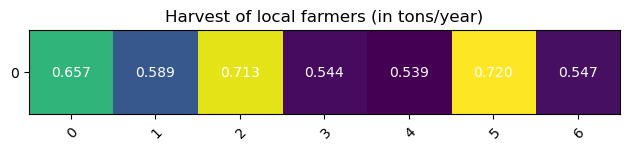

In [ ]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

vegetables = ["cucumber"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = torch.tensor([[0.6574, 0.5891, 0.7131, 0.5443, 0.5389, 0.7204, 0.5465]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, "%.3f"%harvest[i, j].item(),
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()
plt.close(fig)


In [ ]:
weight = torch.tensor([0.6574, 0.5891, 0.7131, 0.5443, 0.5389, 0.7204, 0.5465])
pad_weight = torch.zeros(10)
num_weight = weight.numel() 
pad_weight[:num_weight] = 100
weight, pad_weight 


(tensor([0.6574, 0.5891, 0.7131, 0.5443, 0.5389, 0.7204, 0.5465]),
 tensor([100., 100., 100., 100., 100., 100., 100.,   0.,   0.,   0.]))

In [ ]:
weight.numel()

7

In [ ]:
1/3

0.3333333333333333

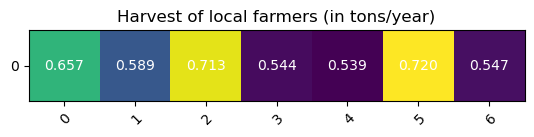

In [ ]:
y, x = weight.size()[0], weight.size()[1]
harvest = torch.tensor([[0.6574, 0.5891, 0.7131, 0.5443, 0.5389, 0.7204, 0.5465]])

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(x))
ax.set_yticks(np.arange(y))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(y):
    for j in range(x):
        text = ax.text(j, i, "%.3f"%harvest[i, j].item(),
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()
